<a href="https://colab.research.google.com/github/Micahgs/Data-science-Assignments/blob/main/DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [84]:
df = pd.read_excel('https://github.com/Micahgs/DATA-science-asiignment-datasets/raw/9abbe809c09a478e6806b78b27fc2411f5a9993b/heart_disease.xlsx'
, sheet_name='Heart_disease')

In [85]:
df.shape

(908, 13)

In [86]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [87]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


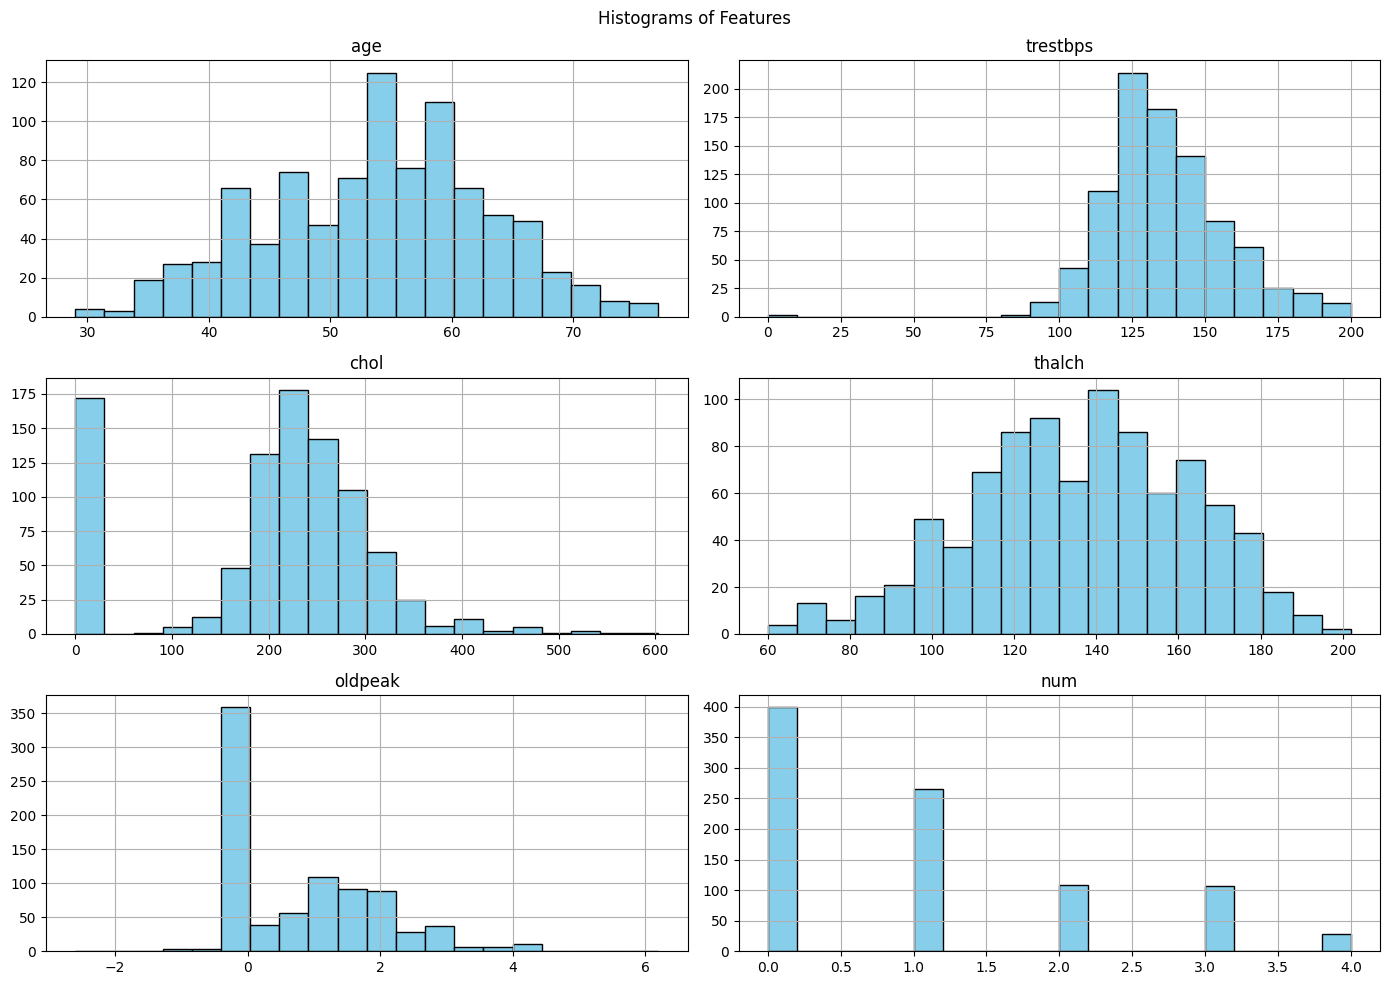

In [88]:
#histograms
df.hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Features')
plt.tight_layout()
plt.show()


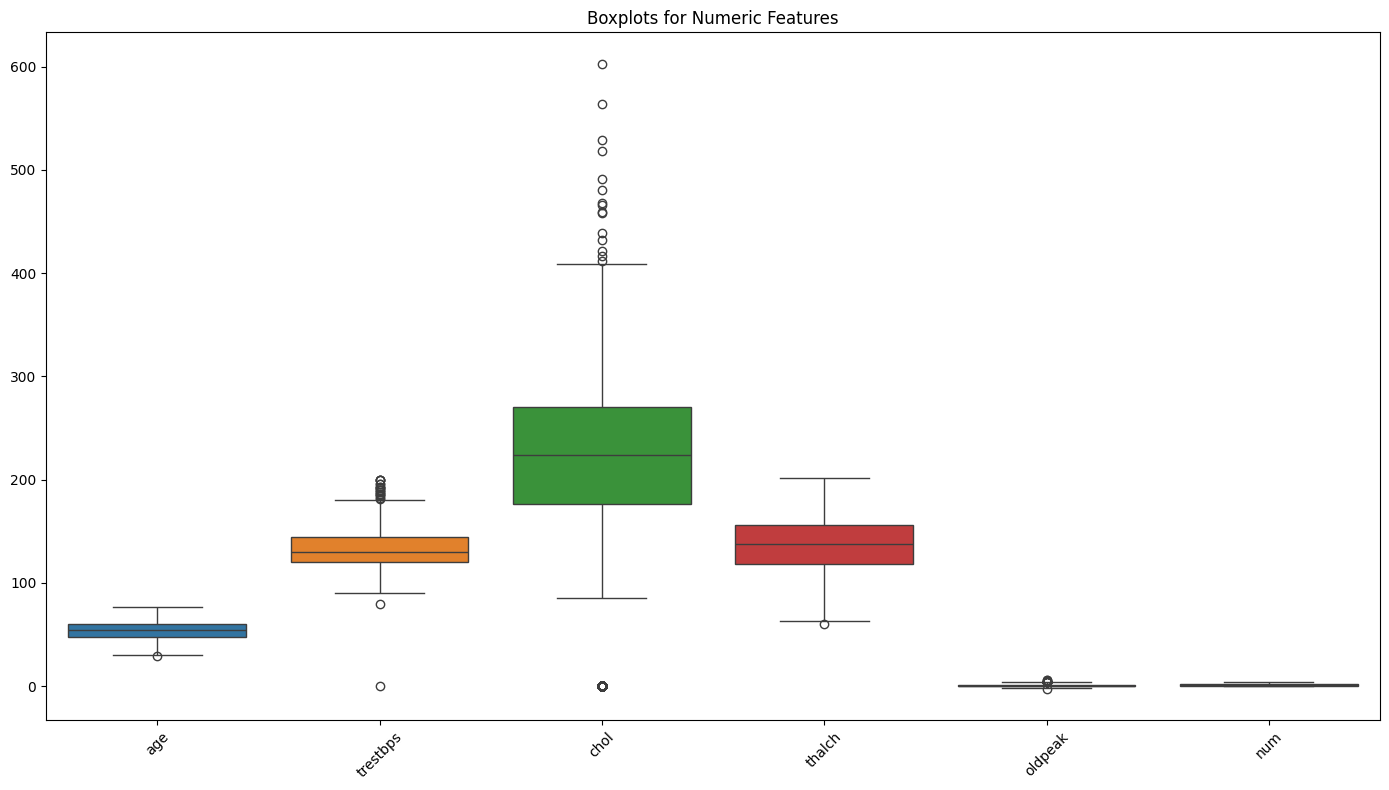

In [89]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title('Boxplots for Numeric Features')
plt.tight_layout()
plt.show()


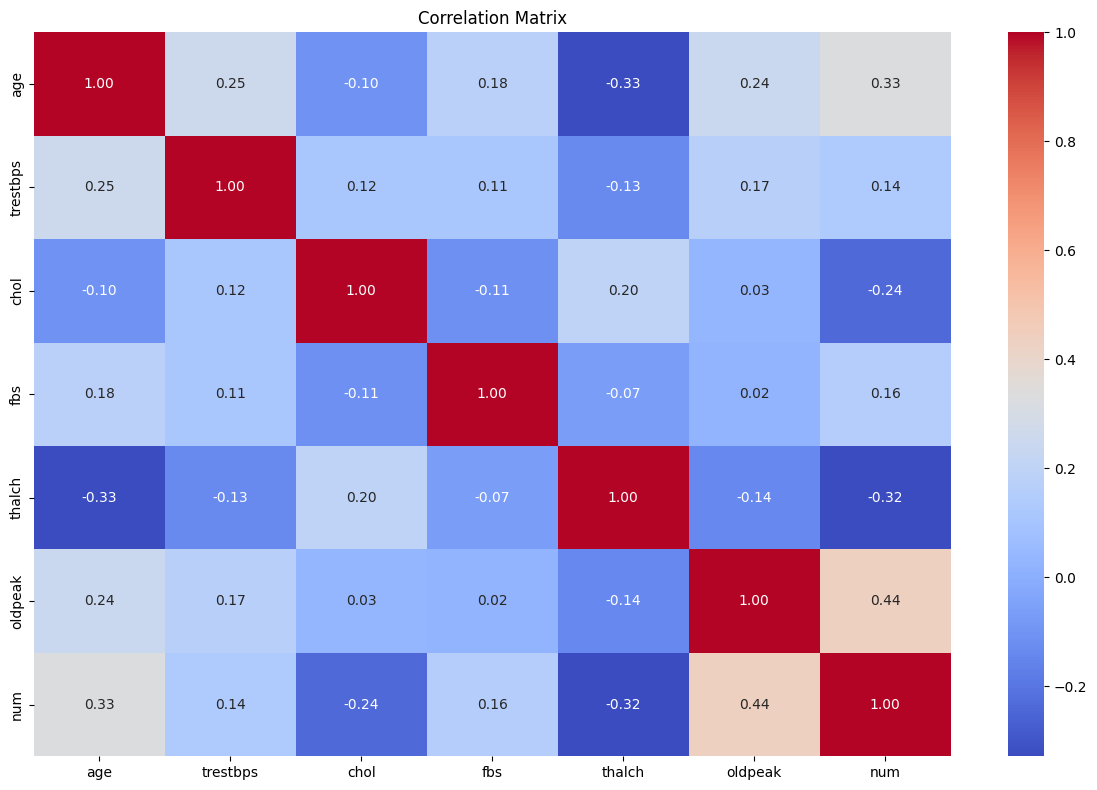

In [90]:
#Corr
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


# Data cleaning and encoding

In [91]:
df['trestbps'] = df['trestbps'].replace(0, np.nan)
df['chol'] = df['chol'].replace(0, np.nan)

df['trestbps'] = df['trestbps'].fillna(df['trestbps'].median())
df['chol'] = df['chol'].fillna(df['chol'].median())


In [92]:
df['fbs'] = df['fbs'].astype(str).str.lower().map({'false': 0, 'true': 1})
df['exang'] = df['exang'].astype(str).str.lower().map({'false': 0, 'true': 1})

In [93]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

In [94]:
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# **Train-Test Split**

In [95]:


# Features and target
X = df.drop('num', axis=1)
y = df['num']

# 80–20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (726, 17)
Testing set size: (182, 17)


In [96]:
dt = DecisionTreeClassifier(random_state=42)
# Train
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)

In [97]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.42857142857142855

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.65      0.66        80
           1       0.40      0.38      0.39        53
           2       0.15      0.14      0.14        22
           3       0.12      0.14      0.13        21
           4       0.00      0.00      0.00         6

    accuracy                           0.43       182
   macro avg       0.27      0.26      0.26       182
weighted avg       0.45      0.43      0.44       182


Confusion Matrix:
 [[52 15  6  5  2]
 [13 20  6 12  2]
 [ 6  6  3  3  4]
 [ 5  8  3  3  2]
 [ 1  1  2  2  0]]


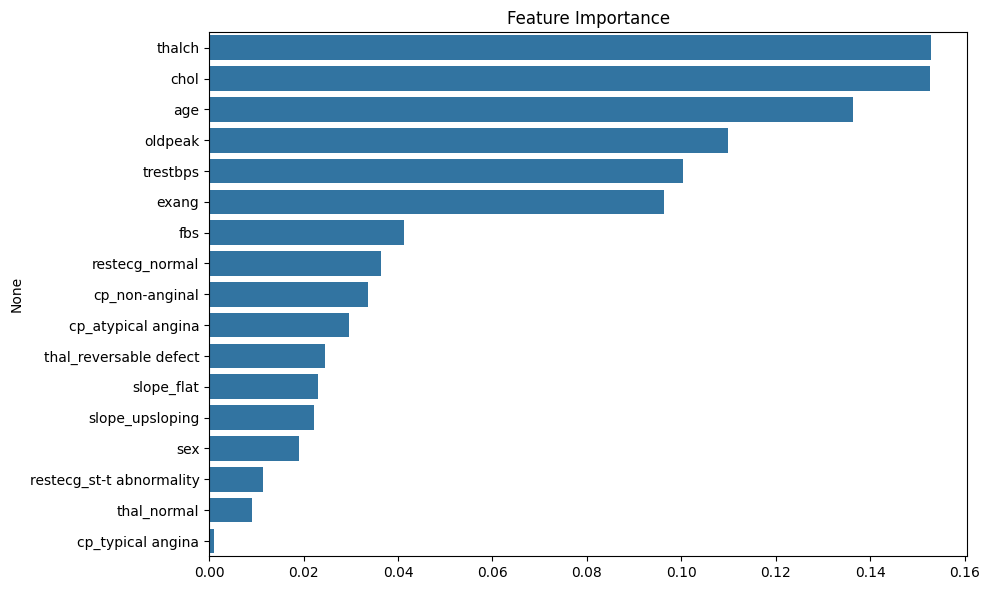

In [98]:
# just using for checking the feature importance
feat_importance = pd.Series(dt.feature_importances_, index=X.columns)
feat_importance = feat_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [99]:
importances = pd.Series(best_dt.feature_importances_, index=X.columns)

importances = importances.sort_values(ascending=False)

print("Feature Importances:\n")
print(importances.round(4))
""" sex                         0.0000
fbs                         0.0000
restecg_st-t abnormality    0.0000
cp_typical angina           0.0000
slope_flat                  0.0000
thal_normal                 0.0000 """
# I've kept this feature alive coz dt manages them well

Feature Importances:

exang                       0.2376
oldpeak                     0.1755
age                         0.1523
cp_atypical angina          0.0865
thalch                      0.0836
cp_non-anginal              0.0816
chol                        0.0626
trestbps                    0.0508
slope_upsloping             0.0309
thal_reversable defect      0.0216
restecg_normal              0.0169
sex                         0.0000
fbs                         0.0000
restecg_st-t abnormality    0.0000
cp_typical angina           0.0000
slope_flat                  0.0000
thal_normal                 0.0000
dtype: float64


' sex                         0.0000\nfbs                         0.0000\nrestecg_st-t abnormality    0.0000\ncp_typical angina           0.0000\nslope_flat                  0.0000\nthal_normal                 0.0000 '

# **Hyperparameter Tuning**

In [100]:
params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)

best_dt = grid.best_estimator_
y_pred_best = best_dt.predict(X_test)



print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Best Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Tuned Accuracy: 0.47802197802197804
              precision    recall  f1-score   support

           0       0.64      0.71      0.67        80
           1       0.39      0.53      0.45        53
           2       0.00      0.00      0.00        22
           3       0.67      0.10      0.17        21
           4       0.00      0.00      0.00         6

    accuracy                           0.48       182
   macro avg       0.34      0.27      0.26       182
weighted avg       0.47      0.48      0.45       182




# **Model Evaluation and Analysis**
The Decision Tree model was evaluated using accuracy, precision, recall, and F1-score. It achieved an accuracy of 47.8%, meaning it made correct predictions in almost half the cases. Performance was strong for class 0 (no heart disease), while classes 2, 3, and 4 showed poor results, likely due to class imbalance.

Feature importance was also analyzed. The most important features influencing the model’s decisions were:

exang (exercise-induced angina)

oldpeak (ST depression during exercise)

age

These features appeared near the top of the tree and played a key role in splitting the data.

The structure of the decision tree was visualized to understand how the model made its predictions. Each node in the tree shows a condition (like oldpeak <= 1.4) and leads to a prediction based on the data. This makes the model highly interpretable and easy to explain.
